In [2]:
import pandas as pd
import numpy as np
import datetime as dt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from sklearn import  neighbors
from sklearn.metrics import mean_absolute_error,mean_squared_error
from scipy import stats

In [3]:
trainday = pd.read_excel(r"G:\traindata\yddata\6-8month.xlsx")#读取展示数据
trainday.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   SALEDATE  66 non-null     datetime64[ns]
 1   MONEY     66 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.2 KB


<Figure size 1080x504 with 0 Axes>

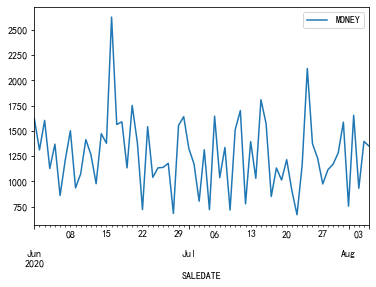

In [4]:
trainday_test  = trainday.copy()
trainday_test.set_index('SALEDATE', inplace=True)
plt.figure(figsize=(15,7))
plt.rcParams['font.sans-serif'] = ['SimHei'] #用来正常显示中文标签 
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号 
trainday_test.plot() 
plt.show()

In [5]:
scaler = StandardScaler()
# result = scaler.fit_transform(y)


In [6]:
trainday_test['MONEY'] = np.log(trainday_test['MONEY'])

In [7]:
trainday_test  = trainday_test.reset_index()
trainday_test

,SALEDATE,MONEY
0,2020-06-01,7.391415
1,2020-06-02,7.179460
2,2020-06-03,7.380318
3,2020-06-04,7.028113
4,2020-06-05,7.221690
...,...,...
61,2020-08-01,6.627022
62,2020-08-02,7.411320
63,2020-08-03,6.837708
64,2020-08-04,7.241538


In [8]:
from statsmodels.tsa.stattools import adfuller as ADF

print(u'原始序列的ADF检验结果为：',ADF(trainday_test[u'MONEY']))

原始序列的ADF检验结果为： (-9.124451243937976, 3.1410612095220004e-15, 0, 65, {'1%': -3.5352168748293127, '5%': -2.9071540828402367, '10%': -2.5911025443786984}, 25.660174337929476)


In [35]:
from statsmodels.stats.diagnostic import acorr_ljungbox

print(u'白噪声检验结果为：',acorr_ljungbox(trainday_test[u'MONEY'],lags=1)) #返回统计量和p值

白噪声检验结果为： (array([1.18786494]), array([0.27576065]))


D:\anaconda\lib\site-packages\statsmodels\stats\diagnostic.py:524: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


In [ ]:
from statsmodels.stats.diagnostic import acorr_ljungbox

print(u'白噪声检验结果为：',acorr_ljungbox(trainday_test,lags=[24,24])) #返回统计量和p值

In [44]:
trainday  = pd.DataFrame(trainday)
X = trainday.iloc[:,trainday.columns != 'MONEY']

In [10]:
print (trainday.dtypes)

SALEDATE    datetime64[ns]
MONEY              float64
dtype: object


In [11]:
train = trainday.iloc[:,trainday.columns == 'SALEDATE'][0:59]
test = train[60:66]

In [12]:
# Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,y,test_size=0.2,random_state =60)

In [13]:
y = trainday.iloc[:,trainday.columns == 'MONEY']
y.info 

<bound method DataFrame.info of        MONEY
0   1621.999
1   1312.200
2   1604.100
3   1127.900
4   1368.800
..       ...
61   755.230
62  1654.609
63   932.350
64  1396.240
65  1348.500

[66 rows x 1 columns]>

In [14]:
# scaler = StandardScaler()
# result = scaler.fit_transform(y)
# result 
# y_log = pd.DataFrame(result)
# y_log
# y_log = np.log(y)

In [36]:
# y_log_moving_avg_diff = y_log-moving_avg
# y_log_moving_avg_diff.dropna(inplace = True)

In [37]:
# moving_avg = y_log.rolling(5).mean()
# plt.plot(y_log ,color = 'blue')
# plt.plot(moving_avg, color='red')
# plt.plot(y_log_moving_avg_diff, color='black')

In [38]:
# y_log_moving_avg_diff = y_log-moving_avg
# y_log_moving_avg_diff.dropna(inplace = True)
# test_stationarity(y_log_moving_avg_diff)

In [40]:
# Y1 = y_log.diff(1)

In [41]:
# Y2 = Y1.diff(2)

In [39]:
# Y3 = Y2.diff(3)

In [42]:

# fig = plt.figure(figsize=(15,6))
# ax1= fig.add_subplot(111)
# # Y1 = sentiment_short.diff(1)
# y_log.plot(ax=ax1)


# fig = plt.figure(figsize=(15,6))
# ax1= fig.add_subplot(111)
# # Y1 = sentiment_short.diff(1)
# Y1.plot(ax=ax1)
 
# fig = plt.figure(figsize=(15,6))
# ax2= fig.add_subplot(111)
# # diff2 = dta.diff(2)
# Y2.plot(ax=ax2)
 
    
# fig = plt.figure(figsize=(15,6))
# ax3= fig.add_subplot(111)
# # diff2 = dta.diff(2)
# Y3.plot(ax=ax3)
    
# plt.show()

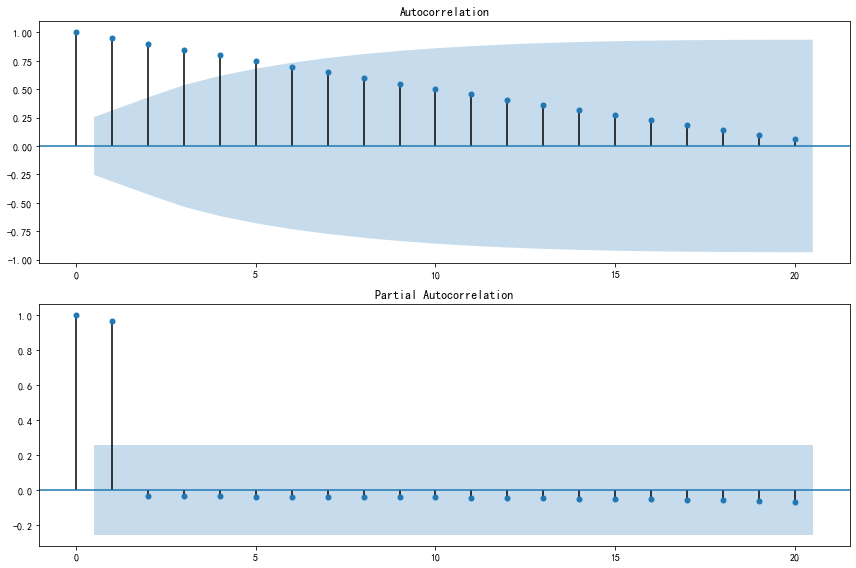

In [22]:

import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
 
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(train, lags=20,ax=ax1)
ax1.xaxis.set_ticks_position('bottom')
fig.tight_layout()
 
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(train, lags=20, ax=ax2)
ax2.xaxis.set_ticks_position('bottom')
fig.tight_layout()
plt.show()

In [23]:

# #遍历，寻找适宜的参数
# import itertools
# import numpy as np
# import seaborn as sns
 
# p_min = 0
# d_min = 0
# q_min = 0
# p_max = 5
# d_max = 0
# q_max = 5
 
# # Initialize a DataFrame to store the results,，以BIC准则
# results_bic = pd.DataFrame(index=['AR{}'.format(i) for i in range(p_min,p_max+1)],
#                            columns=['MA{}'.format(i) for i in range(q_min,q_max+1)])
 
# for p,d,q in itertools.product(range(p_min,p_max+1),
#                                range(d_min,d_max+1),
#                                range(q_min,q_max+1)):
#     if p==0 and d==0 and q==0:
#         results_bic.loc['AR{}'.format(p), 'MA{}'.format(q)] = np.nan
#         continue
 
#     try:
#         model = sm.tsa.ARIMA(train, order=(p, d, q),
#                                #enforce_stationarity=False,
#                                #enforce_invertibility=False,
#                               )
#         results = model.fit()
#         results_bic.loc['AR{}'.format(p), 'MA{}'.format(q)] = results.bic
#     except:
#         continue
# results_bic = results_bic[results_bic.columns].astype(float)
 
# fig, ax = plt.subplots(figsize=(10, 8))
# ax = sns.heatmap(results_bic,
#                  mask=results_bic.isnull(),
#                  ax=ax,
#                  annot=True,
#                  fmt='.2f',
#                  )
# ax.set_title('BIC')
# plt.show()

<Figure size 864x576 with 0 Axes>

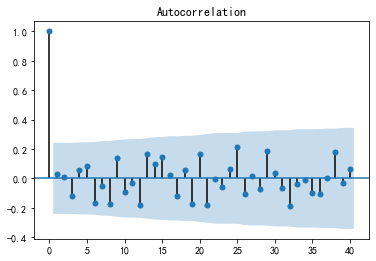

In [24]:

model = sm.tsa.ARIMA(y, order=(1, 0, 1))
results = model.fit()
resid = results.resid #赋值
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.tsa.plot_acf(resid.values.squeeze(), lags=40)
plt.show()


In [25]:
from statsmodels.tsa.arima_model import ARIMA #模型
from statsmodels.tsa.arima_model import ARMA

In [26]:
# def ARMA_model(train_D,train,test,order):
#     arma_model = ARMA(train,order) #ARMA模型
#     result = arma_model.fit()#激活模型
#     #print(result.summary()) #给出一份模型报告
#     ############ in-sample ############
#     pred = result.predict()
    
#     #pred.plot()
#     #train.plot()
#     #print('标准差为{}'.format(mean_squared_error(train,pred)))
    
#     #残差
#     resid = result.resid 
#     #利用QQ图检验残差是否满足正态分布
#     plt.figure(figsize=(12,8))
#     qqplot(resid,line='q',fit=True)
#     #利用D-W检验,检验残差的自相关性
#     print('D-W检验值为{}'.format(durbin_watson(resid.values)))

In [27]:
# ARMA_model(trainday,train,test,(1,0,1))

In [ ]:
# sm.tsa.arma_order_select_ic(y,max_ar=6,max_ma=4,ic='aic')['aic_min_order']  # AIC

In [ ]:
# import statsmodels.tsa.stattools as st
# order = st.arma_order_select_ic(trainday_test['MONEY'],max_ar=5,max_ma=5,ic=['aic', 'bic', 'hqic'])
# order.bic_min_order


In [78]:

model = sm.tsa.ARMA(trainday_test['MONEY'], order=(1,0,1)).fit()
x = model.aic,model.bic,model.hqic
x

        

(25.241260561448996, 31.81022478752827, 27.83697054185652)

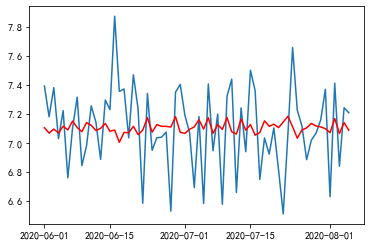

In [79]:
model = sm.tsa.ARMA(trainday_test['MONEY'], order=(1,0,1))
results = model.fit()
plt.plot(X,trainday_test['MONEY'])
plt.plot(X,results.fittedvalues, color='red')

<function matplotlib.pyplot.show(*args, **kw)>

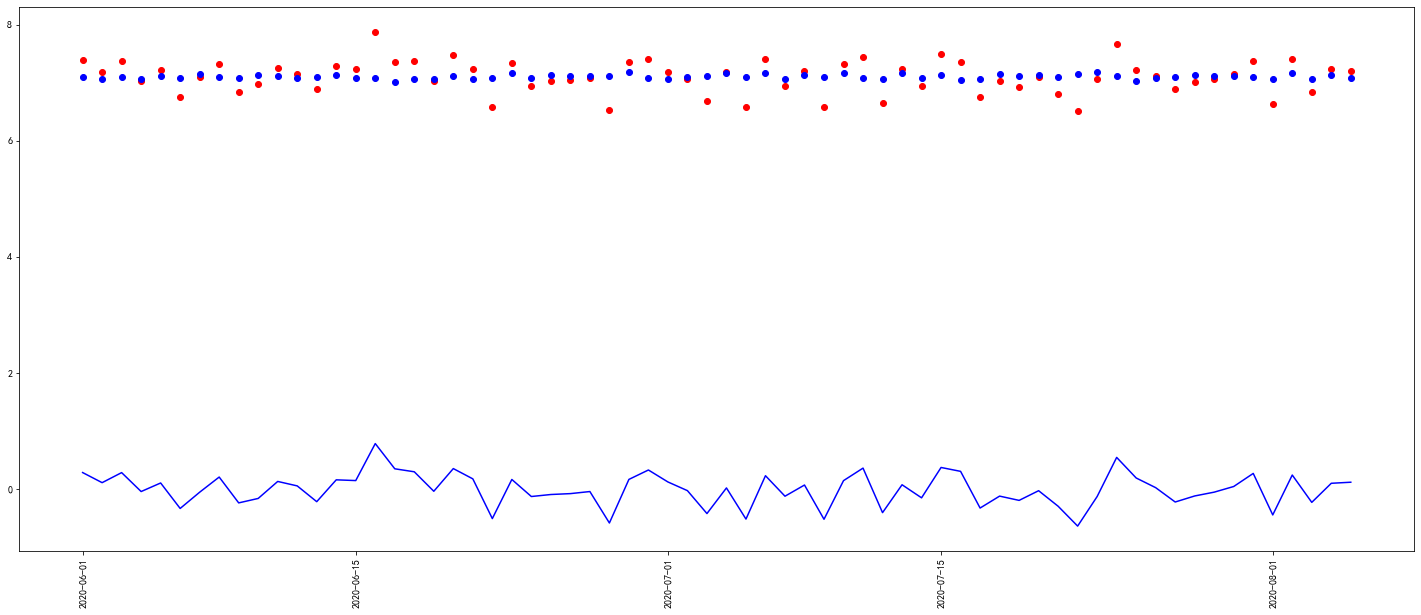

In [80]:
fig = plt.figure(figsize=(25, 10))#展示
ax = fig.add_subplot(111)
ax.plot(X,trainday_test['MONEY'],'ro')
ax.plot(X,results.fittedvalues, 'bo')
ax.plot(X,trainday_test['MONEY'] - results.fittedvalues, 'b-')
plt.xticks(rotation=90)
plt.show

In [81]:
ss = trainday_test['MONEY'].values
z = results.fittedvalues
z = z.values.reshape(-1,1)
def MAPE(true, pred):
    diff = np.abs(np.array(true) - np.array(pred))
    return np.mean(diff / true)
    pint(np.mean(diff / true))
MAPE(ss,z)

0.03229183555986758

In [82]:
MAPE(np.exp(ss),np.exp(z))

0.23727190711890328